In [7]:
import numpy as np
import scipy as sc

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy.stats as ss
from ABC_algorithm import ABC 

def SimulateGK(n, param):  #B>0, K>-1/2 #param is a vector of A, B, g, k
    A, B, g, k = param[0], param[1], param[2], param[3]
    u_values = np.random.uniform(low=0.0, high=1.0, size=n)
    x_values = np.zeros(n)
    for i in range(0,n):
        x_values[i] = A + B*(1+0.8*(1-np.exp(-g*sc.stats.norm.ppf(u_values[i], 0, 1) )) /(1 + np.exp(-g*sc.stats.norm.ppf(u_values[i], 0, 1) ))) *np.power((1+ np.power(sc.stats.norm.ppf(u_values[i], 0, 1),2)),k)*(sc.stats.norm.ppf(u_values[i], 0, 1))    
    return x_values




In [8]:
resultGK = SimulateGK(500,[3,1,2,0.5]) # theta is a vector of dim 4 (A, B, g, k)

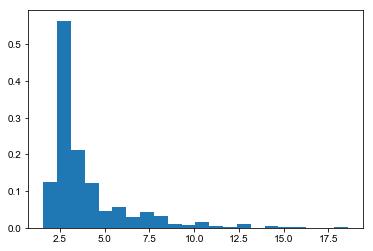

In [9]:
Hist = plt.hist(resultGK, np.round(np.sqrt(len(resultGK)),0), normed=True) #plot the hist for the sampled theta 
plt.show()

In [34]:
data = SimulateGK(100, [3, 1, 2, 0.5])

def GKPriorSampler(n):
    l = []
    for i in range(n):
        l.append(np.random.uniform(low=0.0, high=10.0, size=4)) # we assume uniform [1,10] prior for all 4 parameters
    return l

def GKLiklihoodSimulator(n, param):
    #unknown mean
    return SimulateGK(n, param)
    
def GKSummary(data):
    return np.sort(data)

print np.shape(data)[0]
print GKSummary(data)

100
[  1.67425891   1.83178677   1.87773717   2.14612963   2.22235411
   2.23443229   2.23583804   2.28916623   2.34580648   2.35161439
   2.36889946   2.38357518   2.40242562   2.4164448    2.41891686
   2.44448414   2.46888571   2.47585167   2.50560142   2.53081194
   2.54125373   2.55968802   2.56339097   2.58105204   2.58975382
   2.59096444   2.59672206   2.62419345   2.65973869   2.67491692
   2.68599301   2.72127487   2.7320961    2.74123016   2.75403663
   2.75608134   2.76367538   2.80650667   2.82488344   2.83217334
   2.84212334   2.85601883   2.9672017    2.96825304   2.98357155
   2.98889743   3.02976644   3.14437481   3.20377912   3.24292819
   3.37186901   3.441378     3.57997444   3.66781977   3.88772623
   3.91016892   3.93315742   3.95132996   4.03320133   4.06877056
   4.08358242   4.13854526   4.3348785    4.38052922   4.39629065
   4.42967873   4.56481188   4.70852979   4.80413055   4.891644
   4.99172649   5.0264438    5.12875495   5.42115989   5.47589732
   5.573

In [36]:
######
# run ABC for the GK example
######

import pandas as pd

df = ABC(GKPriorSampler, GKLiklihoodSimulator, GKSummary, 1000, data , 100)
df['param1'] = df['theta'].apply(lambda x: x[0])

######
# plot the accepted and rejected params
######

fig, ax = plt.subplots()

accept_legend_map = {1:'Accepted',0:'Rejected'}
for accept, sub_df in df.groupby('accept'):
    sns.distplot(sub_df['param1'], ax=ax, kde = False, label=accept_legend_map[accept]) #norm_hist =True,

#plt.legend(loc='upper left')


#plt.axvline(x=post_mean, ymin=0, ymax = 120, linewidth=1, color='k', label='True posterior mean')
#plt.legend(loc='upper left')
plt.savefig('plots/gk_example_abc.pdf')

In [38]:
plt.savefig('plots/gk_example_abc.pdf')